# Investigate the TMDb movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This project was written for Udacity’s Data Analyst nanodegree program. The primary goal is to investigate a dataset performing the entire data analysis process with python and libraries such as numpy, pandas and matplotlib.
>
> The TMDb movie dataset was chosen for this purpose. This dataset, which was cleaned from original data on [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata), contains basic information about more than 10 thousand movies, produced between 1960 and 2015.
>
> The scope of this project is very restrict, limited to discussing a few aspects of movies that can be considered a _**success**_. It is assumed that two variables can measure the success of a movie, **vote average scores** and **revenues**, although others can also be used for this purpose.
>
> In the Exploratory Data Analysis section, the following questions will be answered to provide some insights into the data:
> 1. What is the "vote average" mean for each genre? And what are the top 3 genres in terms of the highest "vote average" mean?
> 2. For the movies with the 25% highest vote averages, what is the "vote average" mean in each genre? And what are the top 3 genres in terms of the highest"vote average" mean?
> 3. How does budget correlate to revenue?
> 4. What are the movie genres with the highest mean revenue?

In [1]:
#imports required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
#suppress displaying long numbers in scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)
#load data file into a dataframe
df = pd.read_csv('tmdb-movies.csv')
#returns the first n rows of the dataframe
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


In [3]:
#returns the last n rows of the dataframe
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.08,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.40,1966,0.00,0.00
10862,20379,tt0060472,0.07,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.70,1966,0.00,0.00
10863,39768,tt0060161,0.07,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.50,1966,0.00,0.00
10864,21449,tt0061177,0.06,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.40,1966,0.00,0.00
10865,22293,tt0060666,0.04,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.50,1966,127642.28,0.00


In [4]:
#gets a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
#looks for NA values in the dataframe
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
#checks for duplicate  values
df.duplicated().sum()

1

In [7]:
def count_zeros(dfname):
    """
    Counts zeros in each columns that contains integer or float data.
    """
    for i,column_name in enumerate(dfname.columns):
        if dfname[column_name].dtype=='int64' or dfname[column_name].dtype=='float64':
            print("Count of zeros in", column_name,"column:", dfname[dfname[column_name]==0].shape[0])

In [8]:
count_zeros(df)

Count of zeros in id column: 0
Count of zeros in popularity column: 0
Count of zeros in budget column: 5696
Count of zeros in revenue column: 6016
Count of zeros in runtime column: 31
Count of zeros in vote_count column: 0
Count of zeros in vote_average column: 0
Count of zeros in release_year column: 0
Count of zeros in budget_adj column: 5696
Count of zeros in revenue_adj column: 6016


>**Note:**
>
>It is possible to identify some problems in this dataset, such as:
>* The "release_date" columns should be datetime instead of object;
>* The "budget_adj" and "revenue_adj" columns should be int64 instead of float64;
>* Rename the "budget_adj" and "revenue_adj" columns to make it clear that the values have been adjusted to 2010 dollars;
>* Drop unnecessary columns for this analysis ("imdb_id", "budget", "revenue", "homepage", "tagline", "keywords", "overview", "production_companies");
>* Rows with null values;
>* One duplicated row;
>* Few zeros in the runtime column;
>* Lots of zeros in the "budget_adj" and "revenue_adj".

### Data Cleaning 

#### I) Change columns data types

In [9]:
#converts 'release_date' column to datetime
df['release_date'] = pd.to_datetime(df['release_date'])
#checks changes
df['release_date'].head(1)

0   2015-06-09
Name: release_date, dtype: datetime64[ns]

In [10]:
#converts 'budget_adj' column to integer
df['budget_adj'] = df['budget_adj'].astype(np.int64)
#checks changes
df['budget_adj'].head(1)

0    137999939
Name: budget_adj, dtype: int64

In [11]:
#converts 'revenue_adj' column to integer
df['revenue_adj'] = df['revenue_adj'].astype(np.int64)
#checks changes
df['revenue_adj'].head(1)

0    1392445892
Name: revenue_adj, dtype: int64

#### II) Drop unnecessary columns for the analysis

In [12]:
#drops unused columns
del_col = ['imdb_id', 'popularity', 'budget', 'revenue', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies']
df.drop(del_col, axis=1, inplace=True)
#checks changes
df.head(1)

,id,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.50,2015,137999939,1392445892


#### III) Rename "budget_adj" and "revenue_adj" columns

In [13]:
#renames columns'budget_adj' and 'revenue_adj' to make explicit that the values are adjusted to 2010 dollars
df.rename(columns={'budget_adj':'budget_adj_2010', 'revenue_adj':'revenue_adj_2010'}, inplace=True)
#checks changes
df.head(1)

,id,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj_2010,revenue_adj_2010
0,135397,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.50,2015,137999939,1392445892


#### IV) Drop rows with null values

In [14]:
#drops rows with any null values
df.dropna(inplace=True)
#checks changes
df.isnull().sum()

id                  0
original_title      0
cast                0
director            0
runtime             0
genres              0
release_date        0
vote_count          0
vote_average        0
release_year        0
budget_adj_2010     0
revenue_adj_2010    0
dtype: int64

#### V) Drop the duplicated row

In [15]:
#drops duplicates in the dataset
df.drop_duplicates(inplace=True)
#checks changes
df.duplicated().sum()

0

#### VI) Drop zeros in 'runtime' column

In [16]:
#replaces zeros with NaN in the 'runtime' column
df['runtime'] = df['runtime'].replace(0, np.NaN)
#removes missing values
df = df.dropna(subset = ['runtime'])

#### VII) Check the dataframe shape

In [17]:
#returns the number of rows and columns ih the dataframe
df.shape

(10703, 12)

#### VIII) Check the total of zeros that remain in the dataset 

In [18]:
#counts zeros in each columns that contains integer or float data
count_zeros(df)

Count of zeros in id column: 0
Count of zeros in runtime column: 0
Count of zeros in vote_count column: 0
Count of zeros in vote_average column: 0
Count of zeros in release_year column: 0
Count of zeros in budget_adj_2010 column: 5555
Count of zeros in revenue_adj_2010 column: 5860


>**Note:**
>
>The number of rows with zeros in the "budget_adj_2010" and "revenue_adj_2010" columns correspond to 51.9% and 54.7% of the total rows in the dataset. This is probably due to an error, since it is very unlikely that a movie is produced without a budget or released without generating any revenues. For this reason, the "df" will be used to work with the other variables, preserving the original cleaned dataset. The "df_zero_clean", which is a copy of "df" without the zeros, will be used to explore the budget and revenue variables, even though important data will be lost.

#### IV) Check the total of zeros that remain in the dataset 

In [19]:
#filters the budget and revenue data without zeros
bud_rev = df.query('budget_adj_2010 != 0 & revenue_adj_2010 != 0')
#checks changes
bud_rev.shape

(3848, 12)

#### X) Copy the data frame

In [20]:
#makes a copy of "df" without zeros
df_zero_clean = bud_rev.copy(deep=True)
#checks changes
df_zero_clean.tail()

,id,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj_2010,revenue_adj_2010
10822,396,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,131.00,Drama,2066-06-21,74,7.50,1966,50385110,226643572
10828,5780,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,128.00,Mystery|Thriller,2066-07-13,46,6.30,1966,20154044,87334190
10829,6644,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,120.00,Action|Western,2066-12-17,36,6.90,1966,31258922,40308088
10835,5923,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182.00,Action|Adventure|Drama|War|Romance,2066-12-20,28,7.00,1966,80616176,134360293
10848,2161,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,Richard Fleischer,100.00,Adventure|Science Fiction,2066-08-24,42,6.70,1966,34362645,80616176


In [21]:
##counts zeros in each columns that contains integer or float data
count_zeros(df_zero_clean)

Count of zeros in id column: 0
Count of zeros in runtime column: 0
Count of zeros in vote_count column: 0
Count of zeros in vote_average column: 0
Count of zeros in release_year column: 0
Count of zeros in budget_adj_2010 column: 0
Count of zeros in revenue_adj_2010 column: 0


#### XI) Compare both dataframes

In [22]:
#shows basic statistical details
df.describe()

,id,runtime,vote_count,vote_average,release_year,budget_adj_2010,revenue_adj_2010
count,10703.00,10703.00,10703.00,10703.00,10703.00,10703.00,10703.00
mean,64904.99,102.74,220.33,5.97,2001.24,17810610.74,52142282.14
std,91162.00,30.08,579.48,0.93,12.83,34499875.63,145590906.51
min,5.00,3.00,10.00,1.50,1960.00,0.00,0.00
25%,10538.50,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20235.00,99.00,39.00,6.00,2006.00,0.00,0.00
75%,73637.00,112.00,149.00,6.60,2011.00,21164142.00,34973528.00
max,417859.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.00


In [23]:
#shows basic statistical details
df_zero_clean.describe()

,id,runtime,vote_count,vote_average,release_year,budget_adj_2010,revenue_adj_2010
count,3848.00,3848.00,3848.00,3848.00,3848.00,3848.00,3848.00
mean,39880.10,109.22,528.51,6.17,2001.26,44305111.97,137266980.82
std,67256.90,19.91,880.41,0.79,11.29,44813734.19,216218537.78
min,5.00,15.00,10.00,2.20,1960.00,1.00,2.00
25%,6071.00,95.75,71.00,5.70,1995.00,13184093.25,18438266.75
50%,11311.00,106.00,205.00,6.20,2004.00,30079259.50,61821971.50
75%,38569.75,119.00,581.25,6.70,2010.00,60767198.00,163552750.50
max,417859.00,338.00,9767.00,8.40,2015.00,425000000.00,2827123750.00


#### XII) Check "budget_adj_2010" and "revenue_adj_2010" columns for low values

The summary above showed that there are very low values in the "budget_adj_2010" and "revenue_adj_2010" columns. So it would be nice to check them to make sure it is not an important issue.

In [24]:
#checks for "budget_adj_2010" very low values
low_budget = df_zero_clean.query('budget_adj_2010 <= 10000')
low_budget['budget_adj_2010'].count()

23

In [25]:
#checks for "revenue_adj_2010" very low values
low_revenue = df_zero_clean.query('revenue_adj_2010 <= 10000')
low_budget['revenue_adj_2010'].count()

23

In [26]:
#checks for even lower "budget_adj_2010" values
lower_budget = df_zero_clean.query('budget_adj_2010 <= 1000')
lower_budget['budget_adj_2010'].count()

21

In [27]:
#checks for even lower "revenue_adj_2010" values
lower_revenue = df_zero_clean.query('revenue_adj_2010 <= 1000')
lower_budget['revenue_adj_2010'].count()

21

>**Note:**
>
>In the end, it was decided to maintain these rows. First, because there is not a large number of records. Second, because sometimes the record has an oddly low value for budget, for example, but an expected value for revenue, and vice versa.

<a id='eda'></a>
## Exploratory Data Analysis

### First Part ― df dataframe

### Research question 1: 
### What is the "vote average" mean for each genre? And what are the top 3 genres in terms of the highest "vote average" mean?

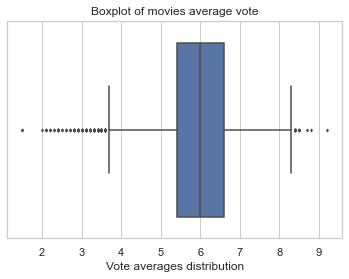

In [63]:
#sets style
sns.set_theme(style="whitegrid")
#plots the boxplot
sns.boxplot(x=df['vote_average'], fliersize=2)
#sets title and labels
plt.title("Boxplot of movies average vote")
plt.xlabel("Vote averages distribution");

In [29]:
df['vote_average'].describe()

count   10703.00
mean        5.97
std         0.93
min         1.50
25%         5.40
50%         6.00
75%         6.60
max         9.20
Name: vote_average, dtype: float64

>**Note:**
>From this boxplot and the basic statistical details, it is possible to notice that, although there are some outliers, the majority of the vote averages are between 5.4 and 6.6.

In [30]:
#makes a copy of "df" to work with genres splited genres
df_splited_genre = df.copy(deep=True)

In [31]:
#for the analysis by genre, it is necessary to split the concatenated genres
#splits a string into a list, to create a list of genres per row
df_splited_genre = df_splited_genre.assign(genres = df_splited_genre['genres'].str.split('|'))
#checks changes
df_splited_genre.head()

,id,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj_2010,revenue_adj_2010
0,135397,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.00,"[Action, Adventure, Science Fiction, Thriller]",2015-06-09,5562,6.50,2015,137999939,1392445892
1,76341,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.00,"[Action, Adventure, Science Fiction, Thriller]",2015-05-13,6185,7.10,2015,137999939,348161292
2,262500,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.00,"[Adventure, Science Fiction, Thriller]",2015-03-18,2480,6.30,2015,101199955,271619025
3,140607,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.00,"[Action, Adventure, Science Fiction, Fantasy]",2015-12-15,5292,7.50,2015,183999919,1902723129
4,168259,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.00,"[Action, Crime, Thriller]",2015-04-01,2947,7.30,2015,174799923,1385748801


In [32]:
#transforms each element of the list into separate rows
df_splited_genre = df_splited_genre.explode('genres')

In [33]:
#checks changes
df_splited_genre.head()

,id,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj_2010,revenue_adj_2010
0,135397,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.00,Action,2015-06-09,5562,6.50,2015,137999939,1392445892
0,135397,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.00,Adventure,2015-06-09,5562,6.50,2015,137999939,1392445892
0,135397,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.00,Science Fiction,2015-06-09,5562,6.50,2015,137999939,1392445892
0,135397,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.00,Thriller,2015-06-09,5562,6.50,2015,137999939,1392445892
1,76341,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.00,Action,2015-05-13,6185,7.10,2015,137999939,348161292


In [34]:
#checks changes in the number of rows
df_splited_genre.shape

(26698, 12)

In [35]:
#group the data by genre and find the vote average mean, sorted in ascending order
vote_mean_genre = df_splited_genre.groupby('genres').vote_average.mean().sort_values()

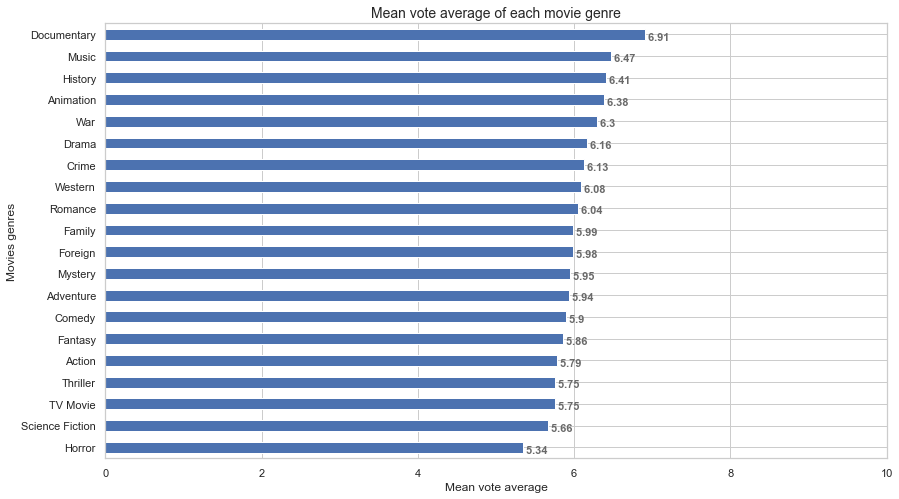

In [36]:
#sets bar chart's size (width, height)
plt.figure(figsize=(14, 8))
#sets the x-limits of the current axes
plt.xlim(0, 10)
#plots the bar chart
ax = vote_mean_genre.plot.barh()
#sets title and labels
ax.set_title("Mean vote average of each movie genre", fontsize=14)
ax.set_ylabel('Movies genres', fontsize=12)
ax.set_xlabel("Mean vote average", fontsize=12)
#for each bar in the bar chart set individual bar lables
for patch in ax.patches:
    ax.text(
#get_x pulls left or right; get_height pushes up or down
        patch.get_width(), 
        patch.get_y(),
#sets decimals places
        " {:.3}".format(patch.get_width()),
#sets font' style
        fontsize=11,
        fontweight='bold',
        color='dimgrey')

>**Note:**
>It can be seen from the chart that the mean "vote average" of each movie genre varies from 5.34 to 6.91. Documentary has the highest mean and Horror the lowest.

### Research question 2:
### For the movies with the 25% highest vote averages, what is the "vote average" mean in each genre? And what are the top 3 genres in terms of the highest"vote average" mean?

In [37]:
#makes a copy of "df" to work with vote average levels
df_va_level = df.copy(deep=True)

In [38]:
def cut_into_quantile(dfname, column_name):
    """
    Cuts the data into quartile
    Returns:
    df - Pandas DataFrame containing a new column that classifies the chosen variable in four level groups
    """
#finds the min, quartiles and max values
    min_value = dfname[column_name].min()
    first_quantile = dfname[column_name].describe()[4]
    second_quantile = dfname[column_name].describe()[5]
    third_quantile = dfname[column_name].describe()[6]
    max_value = dfname[column_name].max()
#bins edges that will be used to "cut" the data into groups
    bin_edges = [min_value, first_quantile, second_quantile, third_quantile, max_value]
#labels for the four level groups
    bin_names = ['low', 'medium', 'mod_high', 'high'] 
#creates the name of the new "levels" column
    name = '{}_levels'.format(column_name)
    dfname[name] = pd.cut(dfname[column_name], bin_edges, labels=bin_names)
    return dfname

In [39]:
#cuts the data into quartile
cut_into_quantile(df_va_level, 'vote_average')

,id,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj_2010,revenue_adj_2010,vote_average_levels
0,135397,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.00,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.50,2015,137999939,1392445892,mod_high
1,76341,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.00,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.10,2015,137999939,348161292,high
2,262500,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.00,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.30,2015,101199955,271619025,mod_high
3,140607,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.00,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.50,2015,183999919,1902723129,high
4,168259,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.00,Action|Crime|Thriller,2015-04-01,2947,7.30,2015,174799923,1385748801,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95.00,Documentary,2066-06-15,11,7.40,1966,0,0,high
10862,20379,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176.00,Action|Adventure|Drama,2066-12-21,20,5.70,1966,0,0,medium
10863,39768,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94.00,Mystery|Comedy,2066-01-01,11,6.50,1966,0,0,mod_high
10864,21449,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80.00,Action|Comedy,2066-11-02,22,5.40,1966,0,0,low


In [40]:
#splits a string into a list, to create a list of genres per row
df_va_level = df_va_level.assign(genres = df_va_level['genres'].str.split('|'))

In [41]:
#transforms each element of the list into separate rows
df_va_level = df_va_level.explode('genres')

In [42]:
#checks changes
df_va_level.head()

,id,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj_2010,revenue_adj_2010,vote_average_levels
0,135397,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.00,Action,2015-06-09,5562,6.50,2015,137999939,1392445892,mod_high
0,135397,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.00,Adventure,2015-06-09,5562,6.50,2015,137999939,1392445892,mod_high
0,135397,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.00,Science Fiction,2015-06-09,5562,6.50,2015,137999939,1392445892,mod_high
0,135397,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.00,Thriller,2015-06-09,5562,6.50,2015,137999939,1392445892,mod_high
1,76341,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.00,Action,2015-05-13,6185,7.10,2015,137999939,348161292,high


In [43]:
#selects the rows with "high" "'vote_average_levels"
high_vote_avg = df_va_level.query('vote_average_levels == "high"')

In [44]:
#group the data by genre and find the vote average mean, sorted in ascending order
highvc_va_mean = high_vote_avg.groupby('genres').vote_average.mean().sort_values()

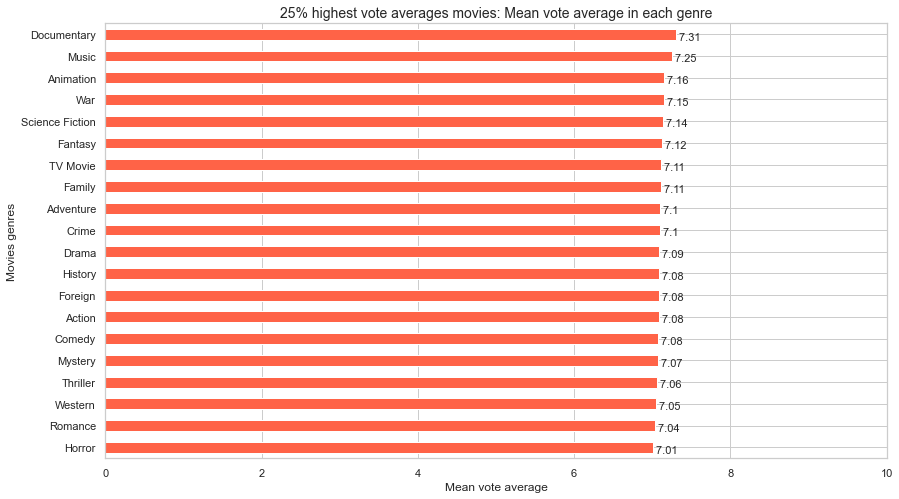

In [45]:
#sets bar chart's size (width, height)
plt.figure(figsize=(14, 8))
#sets the x-limits of the current axes
plt.xlim(0, 10)
#plots the bar chart
ax = highvc_va_mean.plot.barh(color="tomato")
#sets title and labels
ax.set_title("25% highest vote averages movies: Mean vote average in each genre", fontsize=14)
ax.set_ylabel('Movies genres', fontsize=12)
ax.set_xlabel("Mean vote average", fontsize=12)
#for each bar in the bar chart set individual bar lables
for patch in ax.patches:
#get_x pulls left or right; get_height pushes up or down and sets n. decimals
    ax.text(
#get_x pulls left or right; get_height pushes up or down
        patch.get_width(), 
        patch.get_y(),
#sets decimals places
        " {:.3}".format(patch.get_width()),
        fontsize=11)

>**Note:**
>Among the movies with the 25% highest "vote averages", the chart shows that the mean "vote average" of each movie genre varies from 7.01 to 7.31. Once again, Documentary has the highest mean and Horror the lowest.

### Second Part ― df_zero_clean dataframe

In this second part, the “df_zero_clean” is going to be the main data frame used.

In [46]:
#calculates counts of movies released per year
movies_year_count1 = df.groupby('release_year').id.count()
movies_year_count2 = df_zero_clean.groupby('release_year').id.count()
#build the index location for x-axis
index_count1 = movies_year_count1.index
index_count2 = movies_year_count2.index

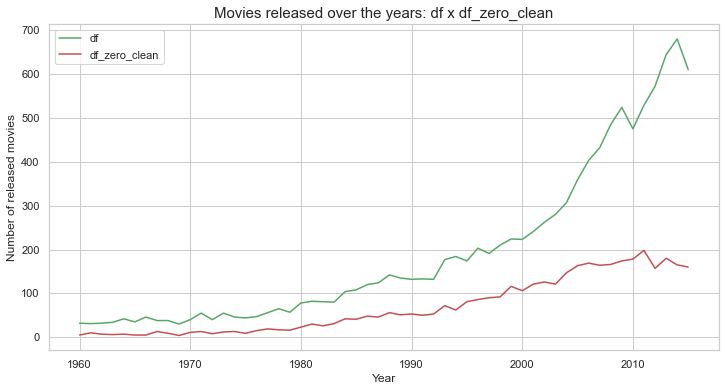

In [47]:
#sets style
sns.set_style('whitegrid')
#sets x, y axis data
#x1, y1 for mean data; x2, y2 for median data
x1, y1 = index_count1, movies_year_count1
x2, y2 = index_count2, movies_year_count2
#sets size
plt.figure(figsize=(12, 6))
#plots line chart for mean and median
plt.plot(x1, y1, color = 'g', label = 'df')
plt.plot(x2, y2, color = 'r', label = 'df_zero_clean')
#sets title and labels
plt.title('Movies released over the years: df x df_zero_clean', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of released movies',  fontsize=12)
#sets legend
plt.legend(loc='upper left');

In [48]:
df.shape

(10703, 12)

In [49]:
df_zero_clean.shape

(3848, 12)

>**Note:**
>There are significant differences between  the “df” and the “df_zero_clean” data frames. The first one has 10703 rows, while the second one has only 3848 rows. Despite that difference, initially, the number of movies released per year grows similarly. However, in the last 10 years of this period, the “df” increases much more rapidly, creating a greater distinction between both data frames, especially, when it comes to more recent movies.

### Research question 3: 
### How does budget correlate to revenue?

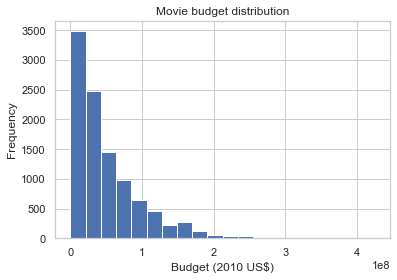

In [71]:
#plots the histogram
df_zero_clean['budget_adj_2010'].hist(bins=20)
#sets title and labels
plt.xlabel('Budget (2010 US$)')
plt.ylabel('Frequency')
plt.title('Movie budget distribution');

In [51]:
df_zero_clean['budget_adj_2010'].describe()

count        3848.00
mean     44305111.97
std      44813734.19
min             1.00
25%      13184093.25
50%      30079259.50
75%      60767198.00
max     425000000.00
Name: budget_adj_2010, dtype: float64

>**Note:**
>This histogram is very skewed to the right, showing that the majority of the movie budgets was less than 2010 US$100 million.

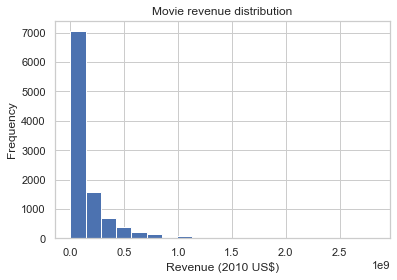

In [70]:
#plots the histogram
df_zero_clean['revenue_adj_2010'].hist(bins=20)
#sets title and labels
plt.xlabel('Revenue (2010 US$)')
plt.ylabel('Frequency')
plt.title('Movie revenue distribution');

In [65]:
df_zero_clean['revenue_adj_2010'].describe()

count        10288.00
mean     151957652.35
std      232517112.85
min              2.00
25%       20454087.00
50%       68728888.00
75%      182616657.00
max     2827123750.00
Name: revenue_adj_2010, dtype: float64

>**Note:**
>This histogram is also very skewed to the right and shows that the majority of the movie revenues was less than 2010 US$ 100 million.

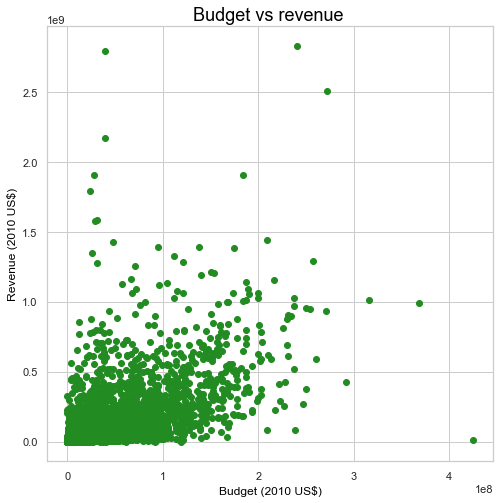

In [54]:
#sets the figure size 
plt.subplots(figsize=(8,8))
#plots the scatterplot
plt.scatter(x=df_zero_clean['budget_adj_2010'], y=df_zero_clean['revenue_adj_2010'], color='forestgreen')
#sets title and labels
plt.xlabel('Budget (2010 US$)',color='black', fontsize = 12)
plt.ylabel('Revenue (2010 US$)',color='black', fontsize = 12)
plt.title('Budget vs revenue ',color='black', fontsize = 18);

In [55]:
#Pearson correlation coefficient between budget and revenue
correlation_coef = df_zero_clean['budget_adj_2010'].corr(df_zero_clean['revenue_adj_2010'],method='pearson')
correlation_coef

0.5701264193677148

>**Note:**
>From this scatter plot and the correlation coefficient, it appears to be a slightly positive relationship between budget and revenue.

### Research Question 4:
### What are the movie genres with the highests mean revenue?

In [56]:
#splits a string into a list, to create a list of genres per row
df_zero_clean = df_zero_clean.assign(genres = df_zero_clean['genres'].str.split('|'))
#transforms each element of the list into separate rows
df_zero_clean = df_zero_clean.explode('genres')
#checks changes in the number of rows
df_zero_clean.head()

,id,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj_2010,revenue_adj_2010
0,135397,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.00,Action,2015-06-09,5562,6.50,2015,137999939,1392445892
0,135397,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.00,Adventure,2015-06-09,5562,6.50,2015,137999939,1392445892
0,135397,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.00,Science Fiction,2015-06-09,5562,6.50,2015,137999939,1392445892
0,135397,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.00,Thriller,2015-06-09,5562,6.50,2015,137999939,1392445892
1,76341,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.00,Action,2015-05-13,6185,7.10,2015,137999939,348161292


In [57]:
#group the data by genre and find the mean revenue
revenue_mean_genre = df_zero_clean.groupby('genres').revenue_adj_2010.mean()/1000000
#sorts in ascending order
revenue_mean_genre.sort_values()

genres
Foreign            12.87
Documentary        26.95
TV Movie           58.39
Horror             81.41
Drama             101.54
Crime             110.40
Mystery           113.62
Romance           113.84
Comedy            121.48
History           121.66
Thriller          128.28
Western           135.67
Music             136.57
War               155.90
Action            195.39
Science Fiction   202.15
Family            243.79
Fantasy           249.99
Adventure         271.41
Animation         290.96
Name: revenue_adj_2010, dtype: float64

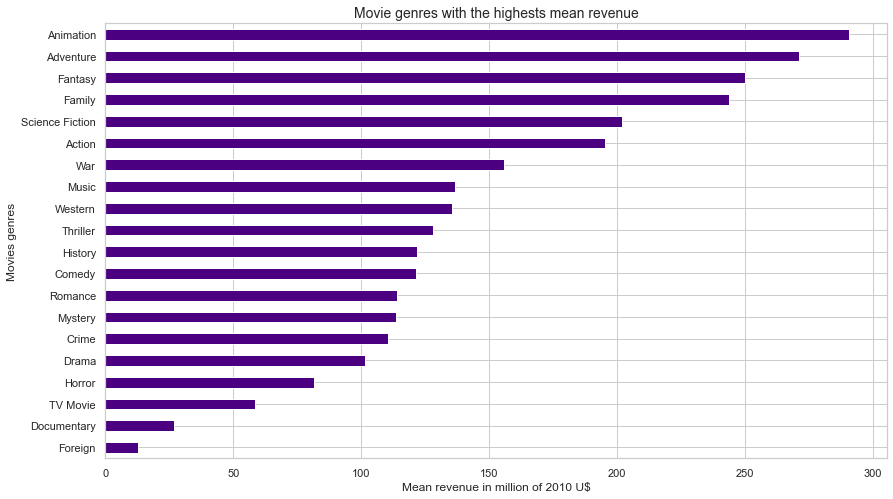

In [58]:
#sets bar chart's size (width, height)
plt.figure(figsize=(14, 8))
#plots the bar chart
ax = revenue_mean_genre.sort_values().plot.barh(color="indigo")
#sets title and labels
ax.set_title("Movie genres with the highests mean revenue", fontsize=14)
ax.set_ylabel('Movies genres', fontsize=12)
ax.set_xlabel("Mean revenue in million of 2010 U$", fontsize=12);

>**Note:**
>It possible to notice from the chart that the mean revenue of movie genres vary from 12.87 to 290.96 million of 2010 U$. Animation is the genre with the highests mean and Foreign the lowest.

<a id='conclusions'></a>
## Conclusions

1. In terms of the highest “vote average” mean, in a 0 to 10 scale, the top three movies genres in the TMDb movie dataset are: Documentary, with 6.91; Music, with 6.47; and History, with 6.41. The genres with the 3 lowest means are: Horror, with 5.34; Science Fiction, with 5.66;  and TV Movie, with 5.75. This means that, in an analysis per genres, Documentary, Music and History are the most successful genres in terms of mean critic/public average ratings.
2. Selecting only the movies with the 25% highest vote averages, it is possible to notice they have a very similar “vote average” mean per genre, all of them in the same level, around 7. The top three movies genres are: Documentary, with 7.31; Music, with 7.25; and Animation, with 7.16. This means that among the most well rated movies, these are the genres that stand out.
3. It seems to be a slightly positive relationship between budget and revenue. The assumption that higher budgets are able to produce higher revenues may look reasonable, but this is not what is observed from this data. In this analysis, the correlation is not very strong. For this reason, budget is not likely to be a good indicator for high movies revenue .
4. The movie genres with the highest mean revenue are: Animation, with 290.96 million dollars (2010); Adventure, with 271.41 million dollars (2010); and Fantasy, with 249.99 million dollars (2010). This means that, from a financial perpective, these are the most sucessful movies genres in the TMDb movie dataset in terms of mean revenues.

## Limitations:

* There are many limitations to the presented analysis, some of them are:
1. The vote_average variable depends on the amount of votes a movie receive, which is the vote_count variable. But movies do not receive votes equally. Some of them receive thousands and others just a few. In a certain way, this number of votes can also be considered as an indicative of a movie’s relevance, meaning rejection or popularity. This unequal number of votes  directly interfere on vote averages, potentially, leading to bias. 
2. The “df” and the “df_zero_clean” data frames are significantly different. The second has considerably less data than the first one. For this reason, the analysis made using the “df_zero_clean” is much more limited compared to the original cleaned data frame, which has the complete set of data. This also can lead to bias in the analysis.

## References

* https://stackoverflow.com/questions/43956335/convert-float64-column-to-int64-in-pandas
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html
* https://www.kaggle.com/tmdb/tmdb-movie-metadata/discussion/45990
* https://cursos.alura.com.br/forum/topico-casas-decimais-dataset-describe-105807
* https://stackoverflow.com/questions/21137150/format-suppress-scientific-notation-from-python-pandas-aggregation-results
* https://stackoverflow.com/questions/52203981/plot-graph-of-the-same-variable-from-two-different-dataframes-in-python
* https://www.kite.com/python/answers/how-to-change-the-axis-scales-of-a-plot-by-a-factor-in-matplotlib-in-python
* https://www.mikulskibartosz.name/how-to-remove-outliers-from-seaborn-boxplot-charts/
* https://gist.github.com/Den1al/5b65c88c791a700dbf4482c41d253727
* https://python-graph-gallery.com/196-select-one-color-with-matplotlib/
* https://seaborn.pydata.org/generated/seaborn.boxplot.html